<a href="https://colab.research.google.com/github/Ragnarok540/sympy-tutorial/blob/main/heat_equation_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# https://www.youtube.com/watch?v=CXOrkQs4WYo

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

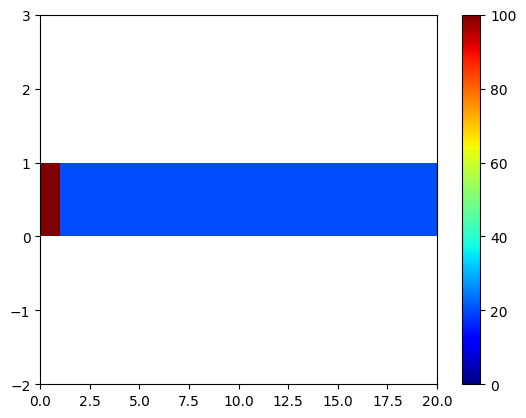

In [39]:
a = 110
length = 50
time = 8
nodes = 20

dx = length / (nodes - 1)
dt = 0.5 * dx**2 / a
t_nodes = int(time / dt) + 1

u = np.zeros(nodes) + 20
u[0] = 100
u[-1] = 20

w_array = []
counter = 0

while counter < time :
    w = u.copy()
    w_array.append(w)

    for i in range(1, nodes - 1):
        u[i] = dt * a * (w[i - 1] - 2 * w[i] + w[i + 1]) / dx**2 + w[i]

    counter += dt

fig, ax = plt.subplots()
pcm = ax.pcolormesh([u], cmap=plt.cm.jet, vmin=0, vmax=100)
plt.colorbar(pcm, ax=ax)
ax.set_ylim([-2, 3])

z = np.array(w_array)

def animate(i):
    pcm.set_array(z[i])

ani = animation.FuncAnimation(fig, animate, frames=160, interval=50)
ani.save('heat_bar.gif', writer='pillow', fps=20)